In [2]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

(864, 1152, 3)


Text(0.5, 1.0, 'image3')

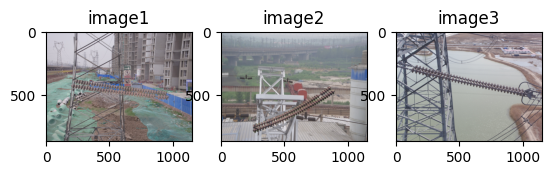

In [26]:
image1 = cv2.imread('./image/000.jpg')
image2 = cv2.imread('./image/001.jpg')
image3 = cv2.imread('./image/0049.jpg')
print(image1.shape[:3])
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('image1')
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('image2')
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.title('image3')

In [5]:
# 1.均方误差 ，MSE越小，表示两幅图像越相似
# mse = np.mean((image1 - image2)**2)
mse = ((image1 - image2) ** 2).mean(axis=None)
mse

107.02494922946674

In [4]:
# 2.模版匹配，第3个参数表示 标准归一化匹配
score = cv2.matchTemplate(image1, image2, cv2.TM_CCORR_NORMED) #模板匹配的操作方法是将模板图像 B 在图像 A 上滑动，遍历所有像素以完成匹配

# 获取相似度最大的位置坐标
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(score)

print('相似度最大的位置和分数分别为:', max_loc, max_val)

相似度最大的位置和分数分别为: (0, 0) 0.9321424961090088


Text(0.5, 1.0, 'difference')

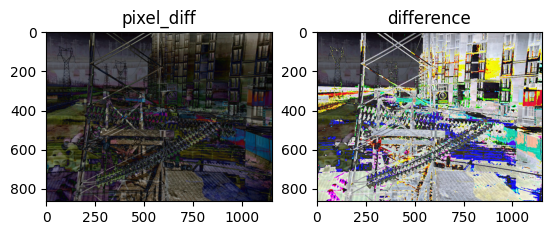

In [8]:
# 3.像素级差异
pixel_diff = cv2.absdiff(image1, image2)  
difference = image1 - image2
# print(pixel_diff)
# print(difference)
# pixel_diff
plt.subplot(1, 2, 1)
plt.imshow(pixel_diff)  
plt.title('pixel_diff')

plt.subplot(1, 2, 2)
plt.imshow(difference)
plt.title('difference')

In [9]:
# 4.结构相似性指数，取值范围[0, 1]，值越大，表示图像失真越小
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
ssim_score = ssim(gray1, gray2)
print(ssim_score)

0.3051793272302352


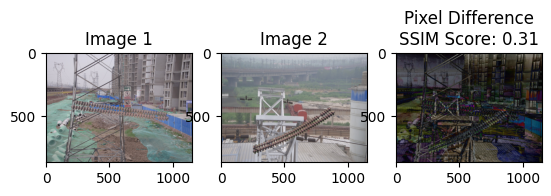

In [10]:
plt.subplot(1, 3, 1) #图排成1行,3列,从左到右第一个位置
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')

plt.subplot(1, 3, 3)
plt.imshow(pixel_diff, cmap='gray')
plt.title(f'Pixel Difference\nSSIM Score: {ssim_score:.2f}')

plt.show()

In [28]:
# 5.感知差异 ，取值范围[0, 1]，值越大表示相似度越高
from PIL import Image
import imagehash

# a = Image.open('./image/000.jpg')
# type(a)

# 生成图像的感知哈希
hash1 = imagehash.average_hash(Image.open('./image/000.jpg'))
hash2 = imagehash.average_hash(Image.open('./image/001.jpg'))
 
# 计算相似度
similarity = 1-(hash1 - hash2) / len(hash1.hash) **2 
print(similarity)

0.4375


In [9]:
# 6.峰值信噪比 ，PSNR 值越高，表示图像越接近原始图像。
# 接近 50dB ，代表压缩后的图像仅有些许非常小的误差。    > 30dB ，人眼很难查觉压缩后和原始影像的差异。
# 20dB ~ 30dB ，人眼就可以察觉出图像的差异。 10dB ~ 20dB ，人眼还是可以用肉眼看出这个图像原始的结构，且直观上会判断两张图像不存在很大的差异。
# < 10dB，人类很难用肉眼去判断两个图像是否为相同，一个图像是否为另一个图像的压缩结果。
psnr = psnr(image1, image2)
psnr

13.536586687654994

In [10]:
# 7.1 直方图差异 
# 直方图过于简单，只能捕捉颜色信息的相似性，捕捉不到更多的信息。
# 只要颜色分布相似，就会判定二者相似度较高，显然不合理

# 将图片转换成HSV模型
image1_hsv = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)
image2_hsv = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)

# 计算直方图
hist1 = cv2.calcHist([image1_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
hist2 = cv2.calcHist([image2_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# 比较直方图
score = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

print('The similarity score is:', score)

The similarity score is: 0.10219557613198527


直方图相似度： 0.8033063186945995


Text(0.5, 1.0, 'Image 2')

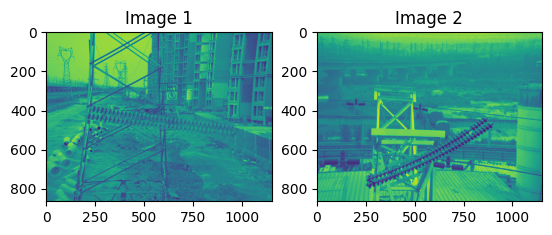

In [11]:
# 7.2 直方图差异

# 将图像转为灰度图像
gray_img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# 计算两张图像的直方图
hist1 = cv2.calcHist([gray_img1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([gray_img2], [0], None, [256], [0, 256])

# 计算直方图相似度
similarity = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

# 输出相似度
print("直方图相似度：", similarity)

# 可视化直方图
plt.subplot(1, 2, 1) #图排成1行,3列,从左到右第一个位置
plt.imshow(gray_img1)
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(gray_img2)
plt.title('Image 2')

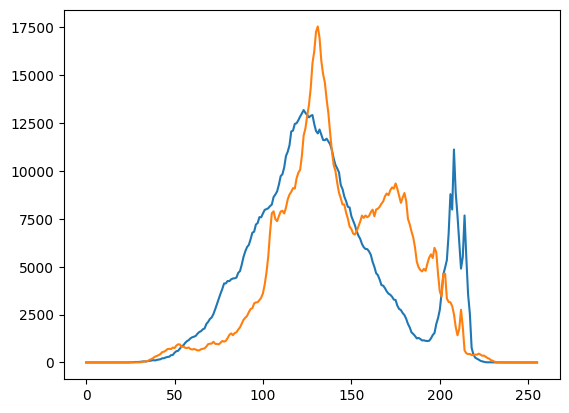

In [12]:
# 直方图可视化
plt.plot(hist1) # 蓝色
plt.plot(hist2) # 橙色
# plt.xlim([0, 256])
plt.show()

In [22]:
image1.size

2985984

In [11]:
#dHash算法属于感知哈希算法，用于图片相似度对比。

#aHash：平均值哈希，速度快，但准确率较低。
#pHash：感知哈希，准确率高，但速度较慢。
#dHash：差异值哈希，速度快，且准确率高。

class DHash(object):
    @staticmethod
    def calculate_hash(image):
        """
        计算图片的dHash值
        :param image: PIL.Image
        :return: dHash值,string类型
        """
        difference = DHash.__difference(image)
        # 转化为16进制(每个差值为一个bit,每8bit转为一个16进制)
        decimal_value = 0
        hash_string = ""
        for index, value in enumerate(difference):
            if value:  # value为0, 不用计算, 程序优化
                decimal_value += value * (2 ** (index % 8))
            if index % 8 == 7:  # 每8位的结束
                hash_string += str(hex(decimal_value)[2:].rjust(2, "0"))  # 不足2位以0填充。0xf=>0x0f
                decimal_value = 0
        return hash_string

    @staticmethod
    def hamming_distance(first, second):
        """
        计算两张图片的汉明距离(基于dHash算法)
        :param first: Image或者dHash值(str)
        :param second: Image或者dHash值(str)
        :return: hamming distance. 值越大,说明两张图片差别越大,反之,则说明越相似
        """
        # A. dHash值计算汉明距离
        if isinstance(first, str):
            return DHash.__hamming_distance_with_hash(first, second)

        # B. image计算汉明距离
        hamming_distance = 0
        image1_difference = DHash.__difference(first)
        image2_difference = DHash.__difference(second)
        for index, img1_pix in enumerate(image1_difference):
            img2_pix = image2_difference[index]
            if img1_pix != img2_pix:
                hamming_distance += 1
        return hamming_distance

    @staticmethod
    def __difference(image):
        """
        *Private method*
        计算image的像素差值
        :param image: PIL.Image
        :return: 差值数组。0、1组成
        """
        resize_width = 9
        resize_height = 8
        # 1. resize to (9,8) ，参数所有可以影响输出像素的输入像素进行高质量的重采样滤波
        smaller_image = image.resize((resize_width, resize_height), Image.LANCZOS)
        # 2. 灰度化 Grayscale
        grayscale_image = smaller_image.convert("L")
        # 3. 比较相邻像素
        pixels = list(grayscale_image.getdata())
        difference = []
        for row in range(resize_height):
            row_start_index = row * resize_width
            for col in range(resize_width - 1):
                left_pixel_index = row_start_index + col
                difference.append(pixels[left_pixel_index] > pixels[left_pixel_index + 1])
        return difference

    @staticmethod
    def __hamming_distance_with_hash(dhash1, dhash2):
        """
        *Private method*
        根据dHash值计算hamming distance
        :param dhash1: str
        :param dhash2: str
        :return: 汉明距离(int)
        """
        difference = (int(dhash1, 16)) ^ (int(dhash2, 16))
        return bin(difference).count("1")

In [16]:
from PIL import Image

# 打开图像
image1 = Image.open('./image/000.jpg')
image2 = Image.open('./image/001.jpg')
# 获取图像的大小
width, height = image2.size

# 打印图像的大小
print([width,height])

# 获取图片的dhash值
dHash1 = DHash.calculate_hash(image1)
dHash2 = DHash.calculate_hash(image2)

# 获取两张图片的汉明距离
hamming_distance = DHash.hamming_distance(image1, image2)
print(hamming_distance)
# 获取dhash值间的汉明距离
hamming_distance = DHash.hamming_distance(dHash1, dHash2)
print(hamming_distance)

[1152, 864]
31
31
